In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
AT = pd.read_pickle(r"data folder\AT\AT_with_topics.pkl")
HR = pd.read_pickle(r"data folder\HR\HR_with_topics.pkl")
GB = pd.read_pickle(r"data folder\GB\GB_with_topics.pkl")

In [3]:
print(AT['my_topic_en'].value_counts())
print("#################################")
print(AT['my_topic_native_language'].value_counts())
print("#################################")
print(AT['Topic'].value_counts())


# First, let's check what columns each country has
print("Column exploration for each country:")
countries = {
    'AT': AT,
    'HR': HR, 
    'GB': GB
}

for country_name, df in countries.items():
    print(f"\n{country_name} columns:")
    topic_columns = [col for col in df.columns if 'topic' in col.lower()]
    print(f"  Topic-related columns: {topic_columns}")

# Create comprehensive comparison tables for all topic types
def create_topic_comparison_table(countries_data, topic_column, title):
    """Create a comparison table for a specific topic type across countries"""
    comparison_data = {}
    
    for country_name, df in countries_data.items():
        # Check if the column exists in this country's data
        if topic_column not in df.columns:
            print(f"Warning: Column '{topic_column}' not found in {country_name} data. Skipping...")
            continue
            
        # Get value counts and percentages
        counts = df[topic_column].value_counts()
        percentages = df[topic_column].value_counts(normalize=True) * 100
        
        # Combine counts and percentages
        combined = pd.DataFrame({
            f'{country_name}_count': counts,
            f'{country_name}_percent': percentages.round(2)
        })
        
        comparison_data[country_name] = combined
    
    if not comparison_data:
        print(f"No data available for column '{topic_column}' in any country.")
        return None
    
    # Merge all countries data
    result = pd.concat(comparison_data.values(), axis=1, sort=False)
    result = result.fillna(0)
    
    print(f"\n{'='*60}")
    print(f"{title}")
    print(f"{'='*60}")
    print(result.to_string())
    
    return result

# Create comparison tables for available topic types
topic_en_comparison = create_topic_comparison_table(
    countries, 'my_topic_en', 
    "ENGLISH TOPICS COMPARISON ACROSS COUNTRIES"
)

topic_native_comparison = create_topic_comparison_table(
    countries, 'my_topic_native_language',
    "NATIVE LANGUAGE TOPICS COMPARISON ACROSS COUNTRIES"
)

topic_comparison = create_topic_comparison_table(
    countries, 'Topic',
    "GENERAL TOPICS COMPARISON ACROSS COUNTRIES"
)

# Try alternative column names that might exist
gb_topic_comparison = create_topic_comparison_table(
    countries, 'my_topic',
    "ALTERNATIVE TOPIC COMPARISON"
)

# Summary statistics
print(f"\n{'='*60}")
print("SUMMARY STATISTICS")
print(f"{'='*60}")

for country_name, df in countries.items():
    print(f"\n{country_name} Dataset:")
    print(f"  Total records: {len(df)}")
    
    # Check available topic columns and show stats only for existing ones
    available_topic_cols = [col for col in ['my_topic_en', 'my_topic_native_language', 'Topic', 'my_topic'] if col in df.columns]
    
    for col in available_topic_cols:
        print(f"  Unique {col}: {df[col].nunique()}")

my_topic_en
Other                    73838
Macroeconomics           20827
Education                15476
Law and Crime            14509
Social Welfare           14260
International Affairs    10389
Agriculture              10119
Culture                   9695
Labor                     8605
Government Operations     7727
Transportation            7534
Health                    7332
Energy                    6533
Defense                   6508
Immigration               5713
Civil Rights              3400
Environment               2740
Domestic Commerce         2686
Housing                   1817
Foreign Trade             1402
Technology                 649
Name: count, dtype: int64
#################################
my_topic_native_language
Other                    75318
Social Welfare           18390
Macroeconomics           17085
Law and Crime            14494
Education                13764
Health                   12675
Government Operations    12093
Agriculture               8948
Tran


CONFUSION MATRIX ANALYSIS: Topic vs my_topic

AT: Cannot create confusion matrix - missing columns: ['my_topic']

HR: Cannot create confusion matrix - missing columns: ['my_topic']

GB - Topic vs my_topic Comparison:
----------------------------------------
Records after removing missing values: 667916 (removed 2996 rows)
Records after removing missing values: 667916 (removed 2996 rows)
Cross-tabulation (counts):
my_topic               Agriculture  Civil Rights  Culture  Defense  \
Topic                                                                
Agriculture                   4315            20       39       38   
Civil Rights                    66          4937     1047      673   
Culture                         12            34     1320       24   
Defense                         46           110      100     6270   
Domestic Commerce              116           171     1500       91   
Education                       88           472      583      119   
Energy                

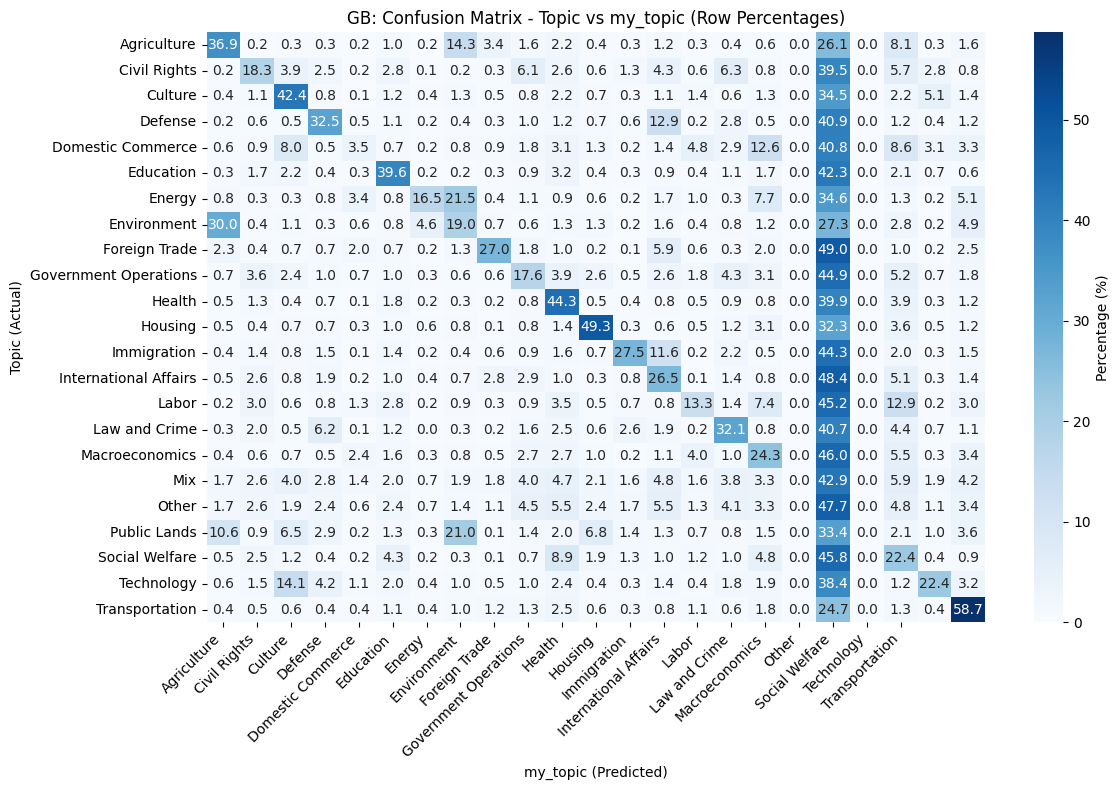

ValueError: `data` and `annot` must have same shape.

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Create confusion matrices to compare Topic vs my_topic
print(f"\n{'='*60}")
print("CONFUSION MATRIX ANALYSIS: Topic vs my_topic")
print(f"{'='*60}")

for country_name, df in countries.items():
    # Check if both columns exist
    if 'Topic' in df.columns and 'my_topic' in df.columns:
        print(f"\n{country_name} - Topic vs my_topic Comparison:")
        print("-" * 40)
        
        # Clean data by removing rows with missing values in either column
        clean_df = df.dropna(subset=['Topic', 'my_topic'])
        
        if len(clean_df) == 0:
            print(f"No valid data for comparison (all rows have missing values)")
            continue
            
        print(f"Records after removing missing values: {len(clean_df)} (removed {len(df) - len(clean_df)} rows)")
        
        # Create confusion matrix
        cm = confusion_matrix(clean_df['Topic'], clean_df['my_topic'])
        
        # Get unique labels
        topic_labels = sorted(clean_df['Topic'].unique())
        my_topic_labels = sorted(clean_df['my_topic'].unique())
        
        # Create a more detailed comparison DataFrame
        comparison_df = pd.crosstab(clean_df['Topic'], clean_df['my_topic'], margins=True)
        print("Cross-tabulation (counts):")
        print(comparison_df)
        
        # Calculate percentage agreement
        total_records = len(clean_df)
        matching_records = len(clean_df[clean_df['Topic'] == clean_df['my_topic']])
        agreement_percentage = (matching_records / total_records) * 100
        
        print(f"\nAgreement Statistics:")
        print(f"  Total records: {total_records}")
        print(f"  Matching records: {matching_records}")
        print(f"  Agreement percentage: {agreement_percentage:.2f}%")
        
        # Show percentage cross-tabulation
        percentage_df = pd.crosstab(clean_df['Topic'], clean_df['my_topic'], normalize='index') * 100
        print(f"\nCross-tabulation (percentages by Topic):")
        print(percentage_df.round(2))
        
        # Create visualization with percentages instead of raw counts
        plt.figure(figsize=(12, 8))
        
        # Calculate percentage confusion matrix (normalize by row - true labels)
        cm_percent = confusion_matrix(clean_df['Topic'], clean_df['my_topic'], normalize='true') * 100
        
        sns.heatmap(cm_percent, 
                   xticklabels=my_topic_labels, 
                   yticklabels=topic_labels,
                   annot=True, 
                   fmt='.1f',  # Show 1 decimal place
                   cmap='Blues',
                   cbar_kws={'label': 'Percentage (%)'})
        plt.title(f'{country_name}: Confusion Matrix - Topic vs my_topic (Row Percentages)')
        plt.xlabel('my_topic (Predicted)')
        plt.ylabel('Topic (Actual)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Also create a second heatmap showing counts but with better formatting
        plt.figure(figsize=(12, 8))
        cm_counts = confusion_matrix(clean_df['Topic'], clean_df['my_topic'])
        
        # Get the actual labels used in the confusion matrix
        actual_topic_labels = sorted(clean_df['Topic'].unique())
        actual_my_topic_labels = sorted(clean_df['my_topic'].unique())
        
        # Create annotations with both count and percentage - ensure proper shape
        annotations = np.empty_like(cm_counts, dtype=object)
        for i in range(cm_counts.shape[0]):
            for j in range(cm_counts.shape[1]):
                count = cm_counts[i, j]
                percentage = cm_percent[i, j]
                if count > 0:
                    annotations[i, j] = f'{count}\n({percentage:.1f}%)'
                else:
                    annotations[i, j] = ''
        
        sns.heatmap(cm_counts, 
                   xticklabels=actual_my_topic_labels, 
                   yticklabels=actual_topic_labels,
                   annot=annotations, 
                   fmt='',
                   cmap='Blues',
                   cbar_kws={'label': 'Count'})
        plt.title(f'{country_name}: Confusion Matrix - Topic vs my_topic (Counts with %)')
        plt.xlabel('my_topic (Predicted)')
        plt.ylabel('Topic (Actual)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Show disagreement examples
        disagreements = clean_df[clean_df['Topic'] != clean_df['my_topic']]
        if len(disagreements) > 0:
            print(f"\nSample disagreements (showing first 10):")
            sample_disagreements = disagreements[['Topic', 'my_topic']].head(10)
            print(sample_disagreements.to_string(index=False))
        
    else:
        missing_cols = []
        if 'Topic' not in df.columns:
            missing_cols.append('Topic')
        if 'my_topic' not in df.columns:
            missing_cols.append('my_topic')
        print(f"\n{country_name}: Cannot create confusion matrix - missing columns: {missing_cols}")

# Overall comparison across all countries that have both columns
print(f"\n{'='*60}")
print("OVERALL TOPIC MAPPING ANALYSIS")
print(f"{'='*60}")

all_mappings = []
for country_name, df in countries.items():
    if 'Topic' in df.columns and 'my_topic' in df.columns:
        # Clean data before adding to combined analysis
        clean_country_data = df[['Topic', 'my_topic']].dropna()
        if len(clean_country_data) > 0:
            clean_country_data = clean_country_data.copy()
            clean_country_data['Country'] = country_name
            all_mappings.append(clean_country_data)

if all_mappings:
    combined_mappings = pd.concat(all_mappings, ignore_index=True)
    
    # Show most common topic mappings with percentages
    mapping_counts = combined_mappings.groupby(['Topic', 'my_topic']).size().reset_index(name='count')
    mapping_counts['percentage'] = (mapping_counts['count'] / len(combined_mappings) * 100).round(2)
    mapping_counts = mapping_counts.sort_values('count', ascending=False)
    
    print("Most common Topic -> my_topic mappings:")
    print(mapping_counts[['Topic', 'my_topic', 'count', 'percentage']].head(20).to_string(index=False))
    
    # Calculate overall agreement
    total_combined = len(combined_mappings)
    matching_combined = len(combined_mappings[combined_mappings['Topic'] == combined_mappings['my_topic']])
    overall_agreement = (matching_combined / total_combined) * 100
    
    print(f"\nOverall Statistics:")
    print(f"  Total records: {total_combined:,}")
    print(f"  Matching records: {matching_combined:,}")
    print(f"  Overall agreement: {overall_agreement:.2f}%")
    
    # Show agreement by country
    print(f"\nAgreement by Country:")
    for country_name, df in countries.items():
        if 'Topic' in df.columns and 'my_topic' in df.columns:
            clean_country = df.dropna(subset=['Topic', 'my_topic'])
            if len(clean_country) > 0:
                country_matches = len(clean_country[clean_country['Topic'] == clean_country['my_topic']])
                country_agreement = (country_matches / len(clean_country)) * 100
                print(f"  {country_name}: {country_agreement:.2f}% ({country_matches:,}/{len(clean_country):,})")
else:
    print("No valid data available for overall comparison")

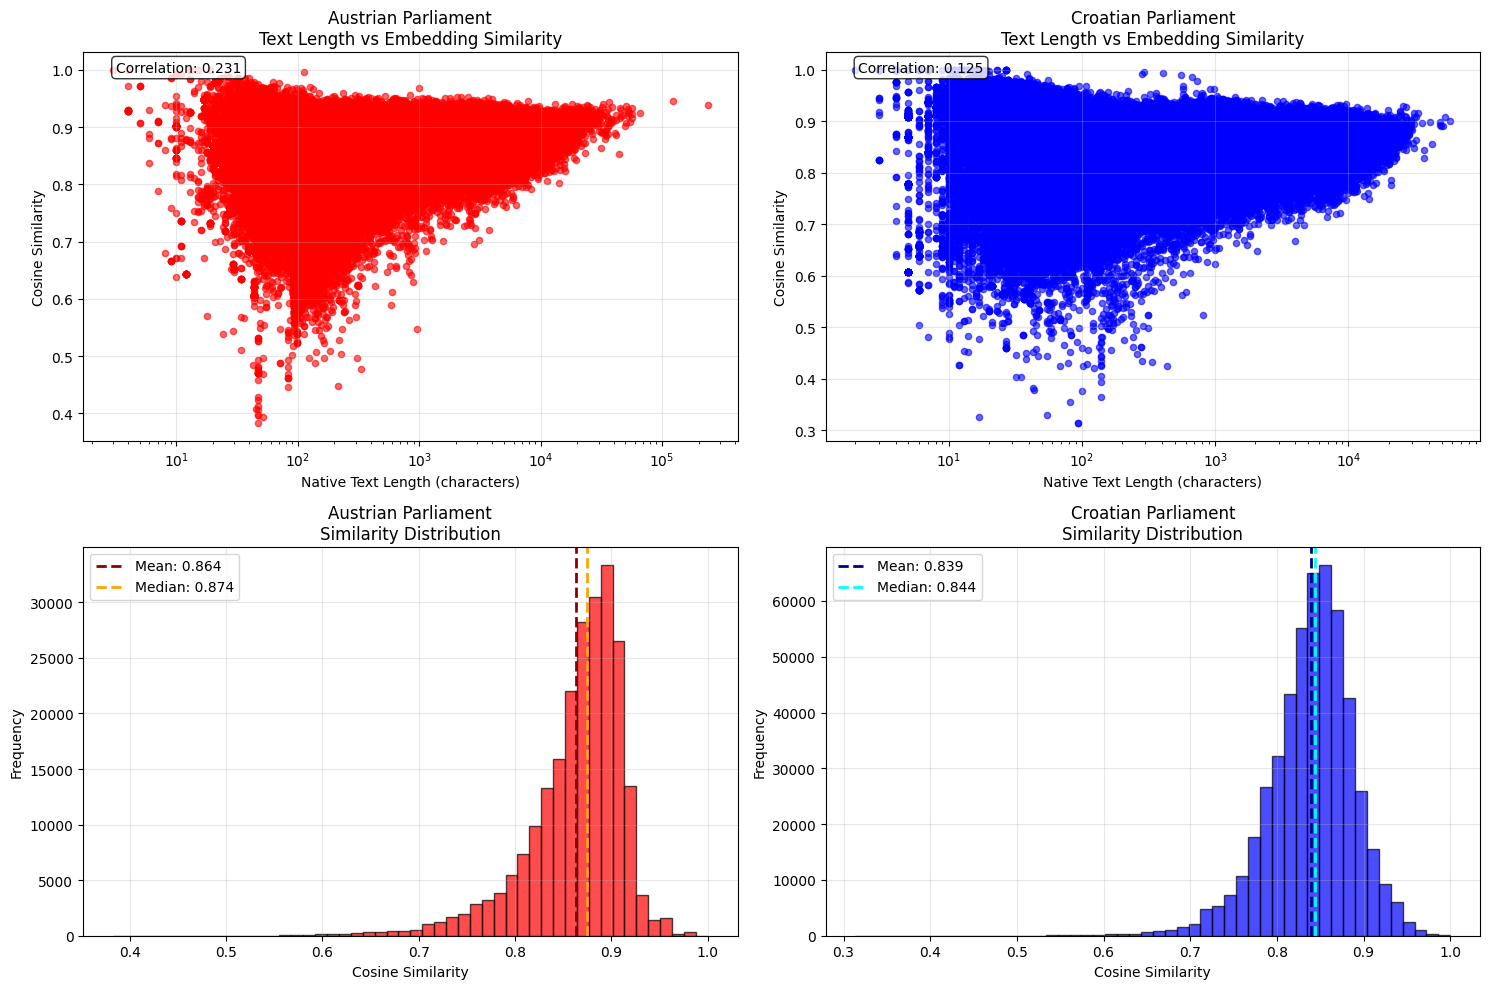

Embedding Similarity Visualization Complete
Austrian (EN-DE): Mean=0.8636, Std=0.0503
Croatian (EN-HR): Mean=0.8390, Std=0.0498


In [8]:
# === EMBEDDING SIMILARITY VISUALIZATION ===

def analyze_embedding_similarities_for_viz(dataset, english_col, native_col, parliament_name):
    """Extract embedding similarities and text lengths for visualization"""
    valid_data = dataset.dropna(subset=[english_col, native_col])
    
    similarities = []
    text_lengths = []
    
    for idx, row in valid_data.iterrows():
        similarity = cosine_similarity([row[english_col]], [row[native_col]])[0][0]
        similarities.append(similarity)
        
        native_text = row.get('Text_native', row.get('Text', ''))
        text_lengths.append(len(native_text))
    
    return similarities, text_lengths

# Get similarity data for visualization
at_similarities, at_lengths = analyze_embedding_similarities_for_viz(
    AT, 'Speech_Embeddings_english', 'Speech_Embeddings_native_language',
    "AUSTRIAN PARLIAMENT (English vs German)"
)

hr_similarities, hr_lengths = analyze_embedding_similarities_for_viz(
    HR, 'Speech_Embeddings_english', 'Speech_Embeddings_native_language', 
    "CROATIAN PARLIAMENT (English vs Croatian)"
)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Length vs Similarity scatter plots
for idx, (similarities, lengths, country, color) in enumerate([
    (at_similarities, at_lengths, "Austrian", "red"),
    (hr_similarities, hr_lengths, "Croatian", "blue")
]):
    ax = axes[0, idx]
    ax.scatter(lengths, similarities, alpha=0.6, s=20, color=color)
    ax.set_xlabel('Native Text Length (characters)')
    ax.set_ylabel('Cosine Similarity')
    ax.set_title(f'{country} Parliament\nText Length vs Embedding Similarity')
    ax.set_xscale('log')
    ax.grid(True, alpha=0.3)
    
    corr = np.corrcoef(lengths, similarities)[0, 1]
    ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Distribution plots
for idx, (similarities, country, color) in enumerate([
    (at_similarities, "Austrian", "red"),
    (hr_similarities, "Croatian", "blue")
]):
    ax = axes[1, idx]
    ax.hist(similarities, bins=50, alpha=0.7, color=color, edgecolor='black')
    ax.axvline(np.mean(similarities), color='darkred' if color=='red' else 'darkblue', 
               linestyle='--', linewidth=2, label=f'Mean: {np.mean(similarities):.3f}')
    ax.axvline(np.median(similarities), color='orange' if color=='red' else 'cyan',
               linestyle='--', linewidth=2, label=f'Median: {np.median(similarities):.3f}')
    ax.set_xlabel('Cosine Similarity')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{country} Parliament\nSimilarity Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Embedding Similarity Visualization Complete")
print(f"Austrian (EN-DE): Mean={np.mean(at_similarities):.4f}, Std={np.std(at_similarities):.4f}")
print(f"Croatian (EN-HR): Mean={np.mean(hr_similarities):.4f}, Std={np.std(hr_similarities):.4f}")